<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Numerical_Methods/Chapter22_ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**22. ORDINARY DIFFERENTIAL EQUATIONS (ODES) INITIAL-VALUE PROBLEMS**
---
**Textbook**: Python Programming and Numerical Methods

**NOTE!** An analytical solution of an ODE is a mathematical expression of the function $f(x)$ that satisﬁes the differential equation and has the initial value. But in many cases, an analytical solution is impossible in engineering and science. A numerical solution of an ODE is a set of discrete points (numerical grid) that approximate the function $f(x)$; we can obtain the solution using these grids.

A common set of known values for an ODE solution is the initial value. For an ODE of order $n$, the initial value is a known value for the 0th to $(n − 1)$-th derivatives at $x = 0$, namely $f(0), f^1(0), f^2(0),..., f^{n-1}(0)$. For a certain class of ordinary differential equations, the initial value is sufficient to find a unique particular solution. Finding a solution to an ODE given an initial value is called the **initial value problem.** Although the name suggests we will only cover ODEs that evolve in time, initial value problems can also include systems that evolve in other dimensions such as space. Intuitively, the pendulum equation can be solved as an initial value problem because under only the force of gravity, an initial position and velocity should be sufficient to describe the motion of the pendulum for all time afterward.

The remainder of this chapter covers several methods of numerically approximating the solution to
initial value problems on a numerical grid. Although initial value problems encompass more than just
differential equations in time, we use time as the independent variable. We use several notations for the
derivative of $f(t): f^{'}(t), f^1(t), \frac{df(t)}{dt}$, and $\dot f$, whichever is most convenient for the context.










####**22.3 THE EULER METHOD**

Let $\frac{dS(t)}{dt} = F(t, S(t))$ be an explicitly defined first order ODE, that is, $F$ is a function that returns the derivative, or change, of a state given a time and state value. Also, let $t$ be a numerical grid of the interval $[t_0, t_f]$ with spacing $h$. Without loss of generality, we assume that $t_0 = 0$ and that $t_f = Nh$ for some positve integer, $N$.

The linear approximation of of $S(t)$ around $t_j$ at $t_{j+1}$ is

$$S(t_{j+1}) = S(t_j) + (t_{j+1} - t_j)\frac{dS(t_j)}{dt},$$

which can also be written

$$S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).$$

This formula is called the **Explicit Euler Formula**. It allows us to compute an approximation for the state at $S(t_{j+1})$ given the state at $S(t_j)$. This is actually based on the Taylor series, whereby we used only the first order item in Taylor series to linearly approximate the next solution.

Starting form a given initial value of $S_0 = S(t_0)$, we can use this formula to integrate the states up to $S(t_f)$; these $S(t)$ values are then an approximation for the solution of the differential equation. The explicit Euler formula is the simplest and most intuitive method for solving initial value problems. At any state $(t_j, S(t_j))$ it uses $F$ at that state to "point" linearly toward the next state and then moves that direction a distance of $h$ as shown in the figure below.


<img src="https://pythonnumericalmethods.studentorg.berkeley.edu/_images/22.03.01-Euler-method-illustration.png" width="400" height="300">


**Steps for solving an initial value problem using the explicit Euler formula**:

**WHAT IS HEPPENING?** Assume we are given a function $F(t, S(t))$ that computes $\frac{dS(t)}{dt}$, a numerical grid, $t$, of the interval, $[t_0, t_f]$, and an initial state value $S_0=S(t_0)$. We can compute $S(t_j)$ for every $t_j$ in $t$ using the following steps:

**1.** Store $S_0 = S(t_0)$ in an array, $S$.

**2.** Compute $S(t_1) = S_0 + hF(t_0, S_0)$.

**3.** Store $S_1 = S(t_1)$ in $S$.

**4.** Compute $S(t_2) = S_1 + hF(t_1, S_1)$.

**5.** Store $S_2 = S(t_2)$ in $S$.

**6.** . . .

**7.** Compute $S(t_f) = S_{f-1} + hF(t_{f-1}, S_{f-1})$.

**8.** Store $S_f = S(t_f)$ in $S$.

**9.** $S$ is an approximation of the solution to the initial value problem.

When using a method with this structure, we say the method **integrates** the solution of the ODE.

**TRY IT!** The differential equation $\frac{df(t)}{dt} = e^{-t}$ with initial condition $f_0 = -1$ has the exact solution $f(t) = -e^{-t}$. Approximate the solution to this initial problem between zero and 1 with increments of $0.1$ using the explicit Euler formula. Plot the difference between approximated solution and the exact solution.

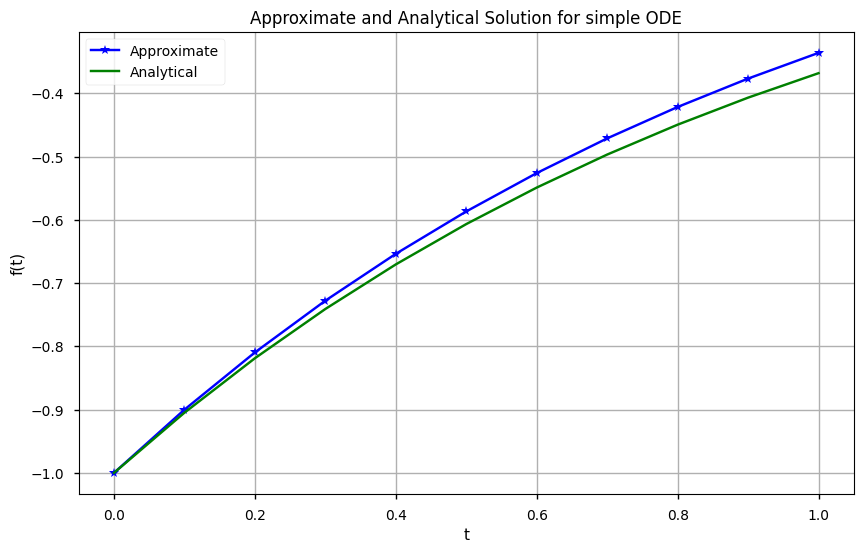

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-notebook')

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
  s[i+1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (10, 6))
plt.plot(t, s, "b-*", label = "Approximate")
plt.plot(t, -np.exp(-t), "g-", label = "Analytical")
plt.title("Approximate and Analytical Solution for simple ODE")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend()
plt.show()

In the above figure, each plot is one approximatio based on the previous dot in a linear fashion. From the initial value, we can eventually obtain an approximation of the solution on the numerical grid.  If we repeat the process for $h = 0.01$, we obtin a better approximation for the solution:

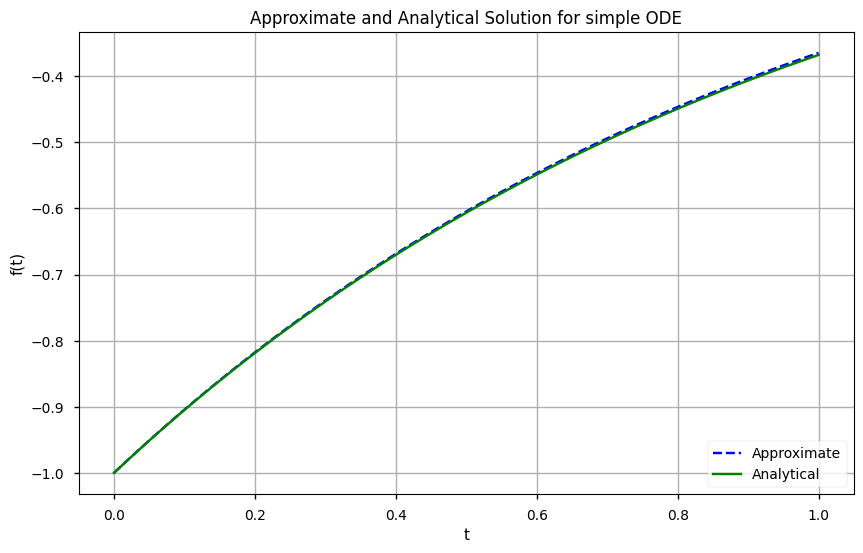

In [ ]:
# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.01 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
  s[i+1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (10, 6))
plt.plot(t, s, "b--", label = "Approximate")
plt.plot(t, -np.exp(-t), "g-", label = "Analytical")
plt.title("Approximate and Analytical Solution for simple ODE")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc = "lower right")
plt.show()

The explicit Euler formula is called "explicit because it only requires information at $t_j$ to compute the state at $t_{j+1}$. That is, $S(t_{j+1})$ can be written explicitly in terms of values we have (i.e., $t_j$ and $S(t_j)$). The **Implicit Euler Formula** can be derived by taking the linear approximation of $S(t)$ around $t_{j+1}$ and computing it at $t_j$:

$$S(t_{j+1}) = S(t_j) + hF(t_{j+1}, S(t_{j+1})).$$

This formula is peculiar because it requires that we know $S(t_{j+1})$ in order to compute $S(t_{j+1})!$
However, it happens that sometimes we *can* use this formula to approximate the solution to initial value problems. Before providing further details about the implicit Euler formula, we first introduce anothr implicit formula called the **Trapezoidal Formula**, which is the average of the explicit and implicit Euler formulas:

$$S(t_{j+1}) = S(t_j) + \frac{h}{2}(F(t_j, S(t_j)) + F(t_{j+1}, S(t_{j+1}))).$$

To illustrate how to solve these implicit schemes, consider again the pendulum equation, which has been reduced to a firs-order equation:

$$\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1\\
-\frac{g}{l} & 0
\end{array}\right]S(t).$$

For this equation,

$$F(t_j, S(t_j)) = \left[\begin{array}{cc}
0 & 1\\
-\frac{g}{l} & 0
\end{array}\right]S(t_j).$$

If we plug this expression into the explicit Euler formula, we obtain the following equation:

$$dS(t_{j+1}) = S(t_j) + h\left[\begin{array}{cc}
0 & 1\\
-\frac{g}{l} & 0
\end{array}\right]S(t_j) = \left[\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}\right]S(t_j) + h\left[\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}\right]S(t_j) = \left[\begin{array}{cc}
1 & h\\
-\frac{gh}{l} & 1
\end{array}\right]S(t_j).$$

Similarly, we can plug the same expression into the implicit Euler formula to obtain

$$\left[\begin{array}{cc}
1 & -h\\
\frac{gh}{l} & 1
\end{array}\right]S(t_{j_+1}) = S(t_j),$$

and ito the trapezoidal formula to obtain

$$\left[\begin{array}{cc}
1 & -\frac{h}{2}\\
\frac{gh}{2l} & 1
\end{array}\right]S(t_{j+1}) = \left[\begin{array}{cc}
1 & -\frac{h}{2}\\
\frac{gh}{2l} & 1
\end{array}\right]S(t_j).$$

With some rearrangement, these equations become respectively

$$S(t_{j+1})= \left[\begin{array}{cc}
1 & -h\\
\frac{gh}{l} & 1
\end{array}\right]^{-1}S(t_j),$$

$$S(t_{j+1})= \left[\begin{array}{cc}
1 & -\frac{h}{2}\\
\frac{gh}{2l} & 1
\end{array}\right]^{-1}\left[\begin{array}{cc}
1 & \frac{h}{2}\\
-\frac{gh}{2l} & 1
\end{array}\right]S(t_j).$$

These equations allow us to solve the initial value problem since at each state, $S(t_j)$, we can compute the next state at $S(t_{j+1})$. In general, this is possible to do when an ODE is linear.





####**22.4 NUMERICAL ERROR AND INSTABILITY**

There are two main issues to consider with regard to integration schemes for ODEs: **accuracy** and
**stability**. Accuracy refers to a scheme’s ability to get close to the exact solution, which is usually
unknown, as a function of the step size $h$. Previous chapters have referred to accuracy using the notation
$O(h^p)$. The same notation can be used to solve ODEs. The stability of an integration scheme is its ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable. Some integration schemes are stable for certain choices of $h$ and unstable for others; these integration schemes are also referred to as unstable.

To illustrate issues of stability, we numerically solve the pendulum equation using the explicit and implicit Euler, as well as trapezoidal, formulas.

**TRY IT!** Use the explicit and implicit Euler, as well as trapezoidal formulas to solve the pendulum equation over the time interval $[0, 5]$ in increments of 0.1, and for an initial solution of $S_0 = \left[\begin{array}{cc}
1\\
0
\end{array}\right]$. For the model parameters using $\sqrt{\frac{g}{l}} = 4$, plot the approximate solution on a single graph.





In [ ]:
# define step-size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T
print(s_e[0, :])
s0 = np.array([[1], [0]])
s0.T
s_e

AttributeError: 'int' object has no attribute 'T'

<>:46: SyntaxWarning: invalid escape sequence '\T'
<>:46: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-2216747638.py:46: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$\Theta(t)$")


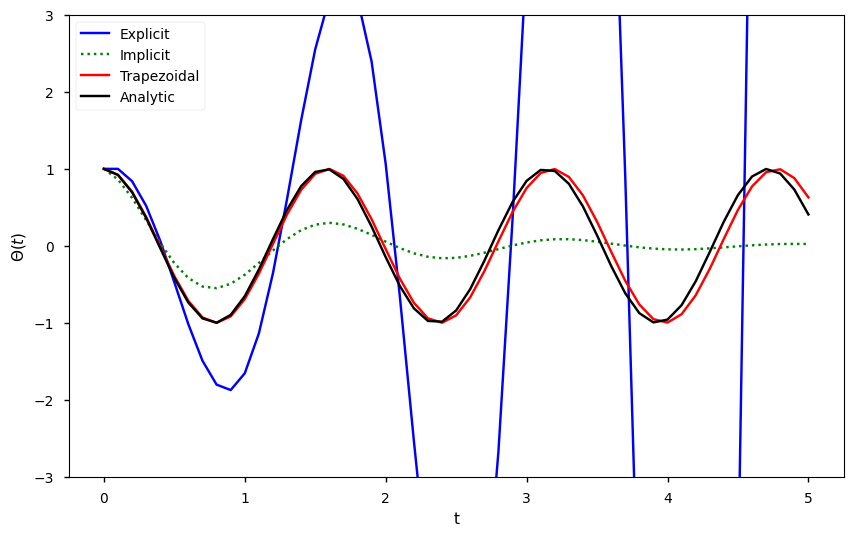

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-notebook')

# define step-size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum; i.e., (g/l)^0.5
w = 4
# initial solution
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
                [-w**2*h, 1]])

m_i = inv(np.array([[1, -h],
                    [w**2*h, 1]]))

m_t = np.dot(inv(np.array([[1, -h/2],
                           [w**2*h/2, 1]])), np.array(
                               [[1, h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t) - 1):
  s_e[j+1, :] = np.dot(m_e, s_e[j, :])
  s_i[j+1, :] = np.dot(m_i, s_i[j, :])
  s_t[j+1, :] = np.dot(m_t, s_t[j, :])

plt.figure(figsize = (10, 6))
plt.plot(t, s_e[:, 0], "b-")
plt.plot(t, s_i[:, 0], "g:")
plt.plot(t, s_t[:, 0], "r-")
plt.plot(t, np.cos(w*t), "k")
plt.ylim([-3, 3])
plt.xlabel("t")
plt.ylabel("$\Theta(t)$")
plt.legend(["Explicit", "Implicit", "Trapezoidal", "Analytic"])
plt.show()


The generated figure above compares the numerical solution to the pendulum problem. The **analytical** solution is a pure cosine wave. The **explicit Euler** scheme is clearly unstable. The **implicit Euler** scheme decays exponentially, which is not correct. The **trapezoidal method** captures the solution correctly, with a small phase shift as time increases.

####**22.5 PREDICTOR-CORRECTOR AND RUNGE-KUTTA METHODS**

#####**22.5.1 PREDICTOR-CORRECTOR METHODS**

Given any time and state, the function, $F(t, S(t))$, returns the change of state $\frac{dS(t)}{dt}$. The **predictor-corrector** methods of solving initial value problems improve the approximation accuracy of non-predictor methods by quering the $F$ function several times at different locations (predictions). Then, using a weighted average of the results (corrections), updates the state. Essentially, it uses two formulas: **a predictor** and **a corrector**. The predictors is an explicit formula and estimates the solution at $t_{j+1}$ first, i.e., we can employ Euler method or some other methods to finish this step. After obtaining the solution $S(t_{j+1})$, we apply the corrector to improve the accuracy. Employing the found $S(t_{j+1})$ on the right-hand side of an otherwise implicit formula, the corrector can calculate a new, more accurate solution.

The **midpoint method** has a predictor step:

$$S(t_j + \frac{h}{2}) = S(t_j) + \frac{h}{2}F(t_j, S(t_j)),$$

which is the prediction of the solution value halfway between $t_j$ and $t_{j+1}$.

It then computes the corrector step:

$$S(t_{j+1}) = S(t_j) + hF(t_j + \frac{h}{2}, S(t_j + \frac{h}{2})),$$

which computes the solution at $S(t_{j+1})$ from $S(t_j)$ but uses the derivative from $S(t_j + \frac{h}{2})$.

#####**22.5.2 RUNGE-KUTTA METHODS**

**Notebook**


####**22.6 PYTHON ODE SOLVERS**

In `SciPy`, there are several built-in functions for solving initial value problems. The most common function is the `scipy.integrate.solve_ivp` function. The function construction is shown below:

**CONSTRUCTION:**

Let $F$ be a function object to the function that computes

$$\frac{dS(t)}{dt} =F(t, S(t)),$$

$$S(t_0) = S_0.$$

The variable $t$ is a one-dimensional independent variable (time), $S(t)$ is an $n$-dimensional vector-valued function (state), and $F(t, S(t))$ defines the differential equations; $S_0$ is an initial value for $S$. The function $F$ *must* have the form $dS = F(t, S)$, although the name does not have to be $F$. The goal is to find the $S(t)$ that approximately satisifies the differential equations given the initial value $S(t_0) = S_0$.

Using the solver to solve the differential equation is as follows:

`solve_ivp(fun, t_span, s0, method "RK45", t_eval = None)`

where `fun` takes in the function in the right-hand side of the system; `t_span` is the interval of integration $(t_0, t_f)$ where $t_0$ is the start and $t_f$ the end of the interval; `s0` is the initial state. There are a couple of methods to choose from: the default is `"RK45"`, which is the explicit Runge-Kutta method of order 5(4). There are other methods we can use as well; `t_eval` takes in the times at which to store the computed solution, ad must be sorted and lie within `t_span`.

**EXAMPLE:** Consider the ODE

$$\frac{dS(t)}{dt} = cos(t)$$

for an initial value of $S_0 = 0$. The analytical solution to this problem is $S(t) = sin(t)$. Use `solve_ivp` to approximate the solution to this initial value problem over the interval $[0, \pi]$. Plot the approximate solutio versus the exact solution and the relative error over time.

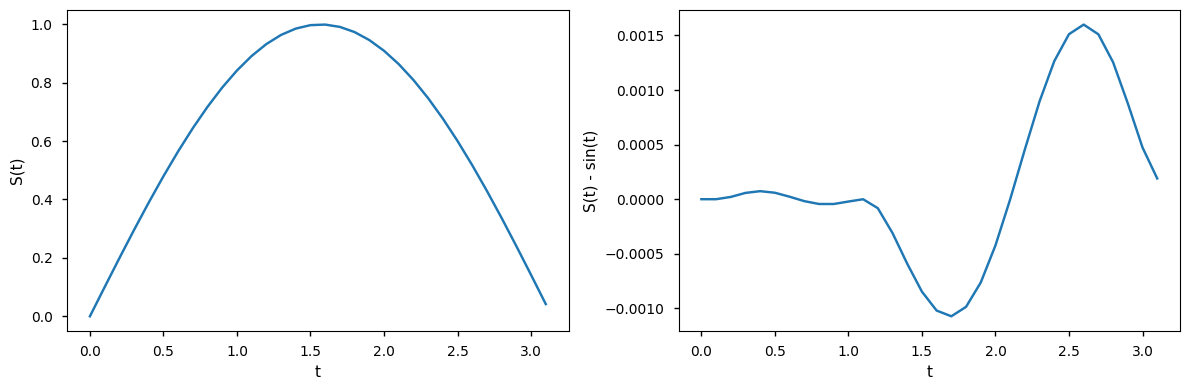

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-v0_8-notebook')

F = lambda t, s: np.cos(t)
t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval = t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel("t")
plt.ylabel("S(t) - sin(t)")
plt.tight_layout()
plt.show()

The above left figure shows the integration of $\frac{dS(t)}{dt} = cos(t)$ with `solve_ivp`. The right figure computes the difference between the solution of the integration by `solve_ivp` and evaluates the analytical solution to this ODE. As ban be seen from the figure, the difference between the approimate and exact solution to this ODE is small. Also, we can contro the relative and absolute tolerances using the `rtol` and `atol` arguments; the solver keeps the local error estimates less than `atol + rtol*abs(S)`. The default values are 1e-3 for `rtol` and 1e-6 for `atol`.

**TRY IT!** Using the `rtol` and `atol` to make the difference between the approximate and exact solution less than 1e-7.

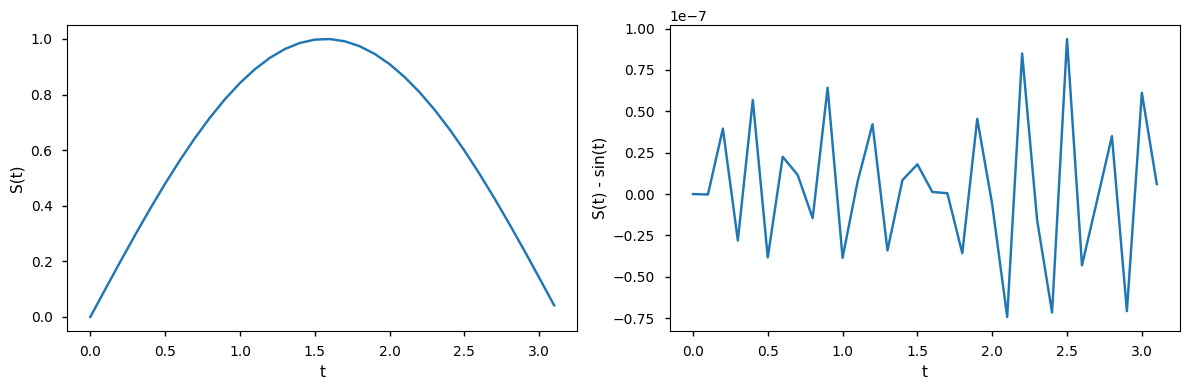

In [ ]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval = t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel("t")
plt.ylabel("S(t) - sin(t)")
plt.tight_layout()
plt.show()

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  3.000e+00  3.100e+00]
        y: [[ 0.000e+00  9.983e-02 ...  1.411e-01  4.158e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 104
     njev: 0
      nlu: 0

In [ ]:
sol.t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.998e+01, 1.999e+01,
       2.000e+01])

**EXAMPLE:** Consider the ODE

$$\frac{dS(t)}{dt} = -S(t),$$

with an initial value of $S_0 = 1$. The exact solution to this problem is $S(t) = e^{-t}$. Use `solve_ivp` to approximate the solution to this initial value problem over the interval $[0, 1]$. Plot the approximate solution versus the analytical solution, and the relative error over time.

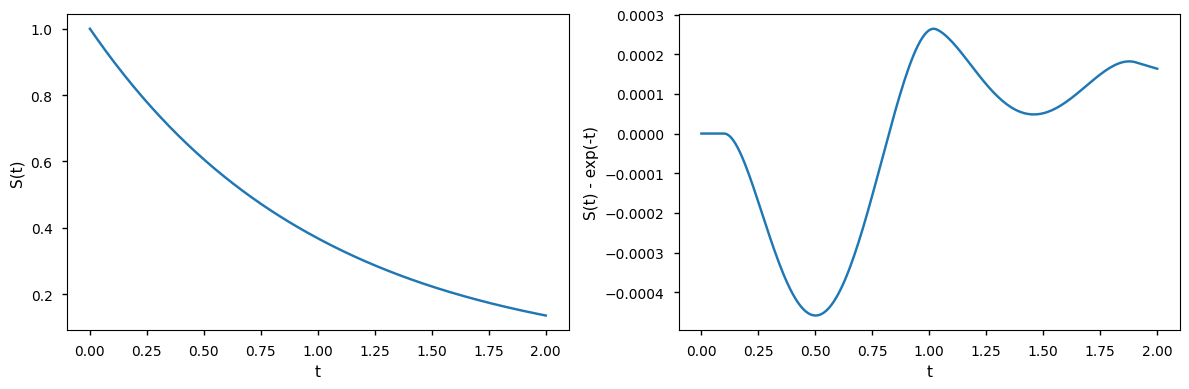

In [ ]:
F = lambda t, s: -s

t_eval = np.arange(0, 2.01, 0.01)
sol = solve_ivp(F, [0, 2], [1], t_eval = t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel("t")
plt.ylabel("S(t) - exp(-t)")
plt.tight_layout()
plt.show()

The above figure shows the corresponding numerical results. As in the previous example, the difference between the result of `solve_ivp` and the evaluation of the analytical solution by Python is very small compared to the value of the function.

**EXAMPLE:** Let the state of a system be defined by $S(t) = \left[\begin{array}{cc}
x(t)\\
y(t)
\end{array}\right]$, and let the evolution of the system be defined by the ODE

$$\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & t^2\\
-t & 0
\end{array}\right]S(t).$$

Use `solve_ivp` to solve this ODE for the time interval $[0, 10]$ with an initial value of $S_0 = \left[\begin{array}{cc}
1\\
1
\end{array}\right]$. Plot the solution in $(x(t), y(t))$.

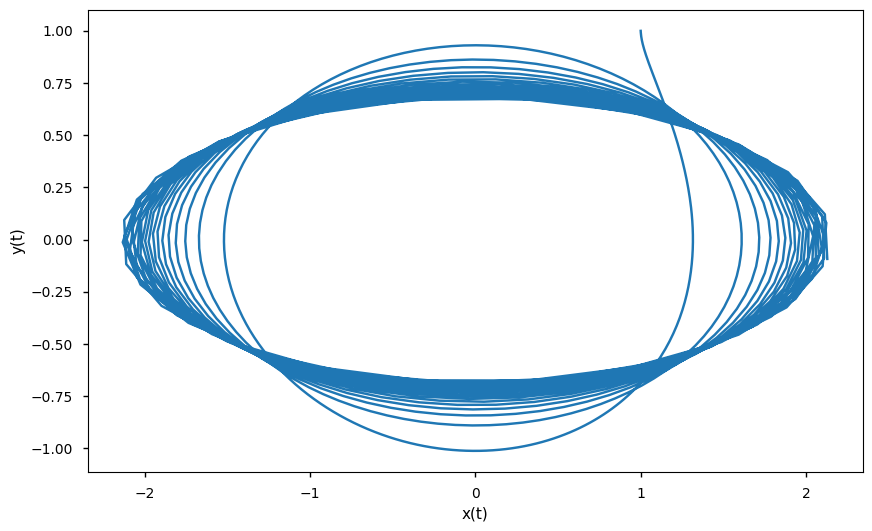

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval = t_eval)

plt.figure(figsize= (10, 6))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.show()

####**22.8 SUMMARY AND PROBLEMS**

#####**22.8.1 SUMMARY**

1. Ordinary differential equations (ODEs) are equations that relate a function to its derivatives, and
initial value problems are a speciﬁc kind of ODE-solving problem.
2. Because most initial value problems cannot be integrated explicitly, they require numerical solutions.
3. There are explicit, implicit, and predictor–corrector methods for numerically solving initial value
problems.
4. The accuracy of the scheme used depends on its order of approximation of the ODE.
5. The stability of the scheme used depends on the ODE, scheme, and choice of the integration parameters.


#####**22.8.2 PROBLEMS**

**1.** The logistic equation is a simple differential equation model that can be used to relate the change in population $\frac{dP}{dt}$ to the current population, $P$, given a growth rate, $r$, and a carrying capacity, $K$. The logistic equation can be expressed by

$$\frac{dP}{dt} = rP(1-\frac{P}{K}).$$

Write a function `my_logistic_eq(t, P, r, K)` that represents the logistic equation with a return of `dP`. Note that this format allows `my_logistic_eq` to be used as an input argument to `solve_ivp`. Assume that the arguments `dP, t, P, r` and `K` are all scalars, and `dP` is the value $\frac{dP}{dt}$ given $r$, $P$, and $K$. Note that the input argument, `t`, is obligatory if `my_logistic_eq` is to be used as an input argument to solve `solve_ivp`, even though it is part of the differential equation.

Note that the logistic equation has an analytic solution defined by

$$P(t) = \frac{FP_0e^{rt}}{K + P_0(e^{rt} - 1)}$$

where $P_0$ is the initial population. Verify that this equation is a solution to the logistic equation.

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
# Test case 1
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial
plt.style.use("ggplot")

def my_logistic_eq(t, P, r, K):
  """
  Calculates the derivative dP/dt for the logistic equation.

  Args:
    t: The current time (scalar).
    P: The current population (scalar).
    r: The growth rate (scalar).
    K: The carrying capacity (scalar).

  Returns:
    The value of dP/dt at the given time and population.
  """
  dPdt = r * P * (1 - P / K)
  return dPdt

# Example usage of the function (calculating dP/dt at a specific point)
dP = my_logistic_eq(0, 10, 1.1, 15)
print(f"dP/dt at t=0, P=10: {dP}")


dP/dt at t=0, P=10: 3.666666666666667


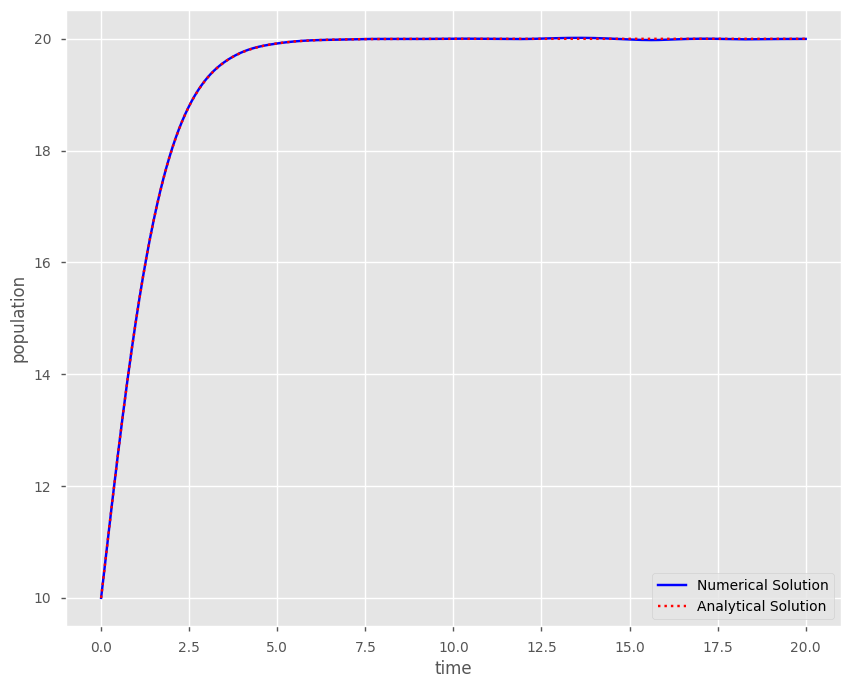

In [ ]:
from functools import partial

t0 = 0
tf = 20
P0 = 10
r = 1.1
K = 20
t = np.linspace(t0, tf, 2001)

f = partial(my_logistic_eq, r = r, K = K)
sol = solve_ivp(f, [t0, tf], [P0], t_eval = t)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0], "b")
plt.plot(t, K*P0*np.exp(r*t)/(K + P0*(np.exp(r*t) - 1)), "r:")
plt.xlabel("time")
plt.ylabel("population")

plt.legend(["Numerical Solution", "Analytical Solution"])
plt.grid(True)
plt.show()

**2.** The Lorenz attractor is a system of ordinary differential equations that was originally developed to model convection currents in the atmosphere. The Lorenz equations can be written as follows:

$$\frac{dx}{dt} = \sigma(x-y),$$

$$\frac{dy}{dt} = x(\rho-z) - y,$$

$$\frac{dz}{dt} = xy-\beta{z},$$

where $x, y,$ and $z$ represent the position in three dimensions, and $\sigma, \rho,$ and $\beta$ are scalar parameters of the system. Write a function `my_lorenz(t, S, sigma, rho, beta)` where `t` is a scalar denoting time, `S` is a 3D array denoting the position $(x, y, z)$, and `sigma`, `rho`, and `beta` are strictly positive scalars representing $\sigma, \rho$, and $\beta$. The output argument $dS$ should be the same size as $S$.

In [ ]:
# Test case
import numpy as np
def my_lorenz(t, S, sigma, rho, beta):
  """
  Calculates the derivative dS/dt for the Lorenz attractor.

  Args:
    t: The current time (scalar).
    σ: Prandtl number (scalar).
    ρ: Rayleigh number (scalar).
    β: Relates to the physical dimensions of the fluid layer itself (scalar).

  Returns:
    The value of dS/dt at the given time and the given parameters.
  """
  # Define the spatial coordinates
  x = S[0]
  y = S[1]
  z = S[2]

  # Define Lorenz attractor equations
  dxdt = sigma*(y - x)
  dydt = x*(rho - z) - y
  dzdt = x*y - beta*z
  dS = np.array([dxdt, dydt, dzdt])

  return dS

s = np.array([1, 2, 3])
dS = my_lorenz(0, s, 10, 28, 8/3)
dS

array([10., 23., -6.])

**3.** Write a function `my_lorenz_solver(t_span, s0, sigma, rho, beta)` that solves the Lorenz equations using`solve_ivp`, the function returns `[T, X, Y, Z]`. The input argument `t_span` should be a list of the form $[t_0, t_f]$, where $t_0$ is the initial time and $t_f$ is the final time of consideration. The input argument `s0` should be a 3D array of the form $[x_0, y_0, z_0]$, where $(x_0, y_0, z_0)$ represents an initial position. Finally, the input arguments `sigma`, `rho`, and `beta` are the scalar parameters $\sigma$, $\rho$, and $\beta$ of the Lorenz system. The output argument `T` should be an array of times given as the output argument of `solve_ivp`. The output arguments `X, Y` and `Z` should be the numerically integrated solution produced from `my_lorenz` in the previous problem and `solve_ivp`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from functools import partial

def my_lorenz_solver(t_span, s0, sigma, rho, beta):
  """
  Calculates the derivative dS/dt for the Lorenz attractor.

  Args:
    t_span: Time span (interval).
    s0: 3D array that represents the initial positions x0, y0, and z0
    σ: Prandtl number (scalar).
    ρ: Rayleigh number (scalar).
    β: Relates to the physical dimensions of the fluid layer itself (scalar).
  Returns:
    The numerically integrated solution of Lorenz system.
  """
  # Use partial to pass the additional arguments to my_lorenz
  f = partial(my_lorenz, sigma=sigma, rho=rho, beta=beta)

  t_eval = np.arange(t_span[0], t_span[1], 0.01)
  solution = solve_ivp(f, t_span, s0, t_eval = t_eval)
  T = solution.t
  X = solution.y[0]
  Y = solution.y[1]
  Z = solution.y[2]

  return [T, X, Y, Z]

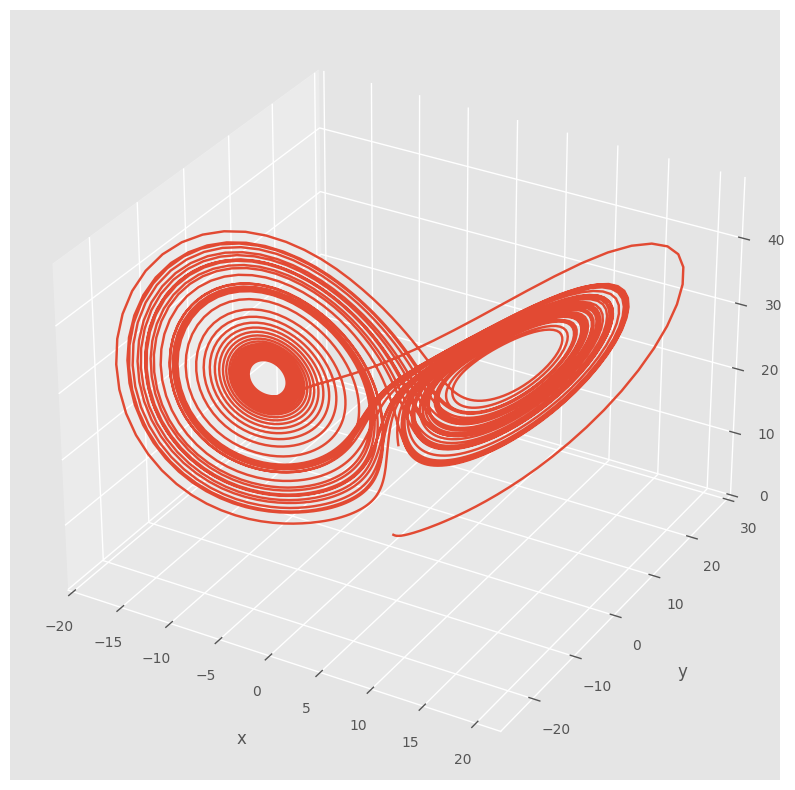

In [ ]:
sigma =10
rho =28
beta = 8/3
t0 =0
tf =50
s0 = np.array([0, 1, 1.05])
[T, X, Y, Z] = my_lorenz_solver([t0, tf], s0, sigma, rho, beta)

from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection="3d")
ax.grid()
ax.plot3D(X, Y, Z)
# Set axes label
ax.set_xlabel("x", labelpad=20)
ax.set_ylabel("y", labelpad=20)
ax.set_zlabel("z", labelpad=20)
plt.show()


**4.** Consider the following model of a *mass-spring-damper* (MSD) system in one dimension. In this figure, *m* denotes the mass of the block, *c* is called the damping coefficient, and *k* is the srping stiffness. A damper is a mechanism that dissipates energy in the system by resisting velocity. The MSD system is a simplistic model of several engineering applications, such as shock observers and structural systems.

The relationship between acceleration, velocity, and displacement can be expressed by the following MSD differential equation:

$$m\ddot{x} + c\dot{x} + kx = 0,$$

which can be rewritten as

$$\ddot{x} = \frac{-(c\dot{x} + kx)}{m}.$$

Let the state of the system be denoted by the vector $S = [x; v]$ where $x$ is the displacement of the mass from its resting configuration, and $v$ is its velocity. Rewrite the MSD equation as a first-order differential equation in terms of the state, $S$. In other words, rewrite the MSD equation as $dS/dt = f(t, S)$.

Write a function `my_msd(t, S, m, c, k)` where `t` is a scalar denoting time, `S` is a 2D vector denoting the state of the MSD system, and `m`, `c`, and `k` are the mass, damping, and stiffness coefficients of the MSD equation, respectively.


**Solution:**

First, we define the components of the state vector:

$s_1 = x$

$s_2 = \frac{dx}{dt} = v$

1. Find the derivatives of each state equation:

$\frac{ds_1}{dt} = \frac{dx}{dt} = s_2\space (equation\space1)$

$\frac{ds_2}{dt} = \frac{d^2x}{dt^2} = \frac{dv}{dt} = \ddot{x}\space(equation\space2)$

2. From the orginal equation we substitute $x$ and $\frac{dx}{dt}$ with their corresponding state variables, $s_1$ and $s_2$:

$\frac{ds_2}{dt} = -\frac{1}{m}(cs_2 + ks_1)$

3. By combining equation (1) and (2) (first-order differential equations), we can express the entire system in vector form:

$\frac{ds}{dt} = \left(\begin{array}{cc}
\frac{ds_1}{dt}\\
\frac{ds_2}{dt}
\end{array}\right) = \left(\begin{array}{cc}
s_2\\
-\frac{1}{m}(c\cdot{s_2} + k\cdot{s_1})
\end{array}\right)$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from functools import partial

def my_msd(t, S, m, c, k):
  """
  Calculates the derivative dS/dt for the MSD system.

  Args:
    t: Time (scalar).
    S: 2D array that represents the state of the MSD system (initial conditions).
    m: Mass of the block (scalar).
    c: damping coefficient (scalar).
    k: spring stiffness (scalar).
  Returns:
    The numerically integrated solution of MSD system.
  """
  ds_x = S[1]
  ds_v = -(1/m)*(k*S[0] + c*S[1])

  return [ds_x, ds_v]


In [ ]:
# Test 1
my_msd(0,[1, -1], 10, 1, 100)

[-1, -9.9]

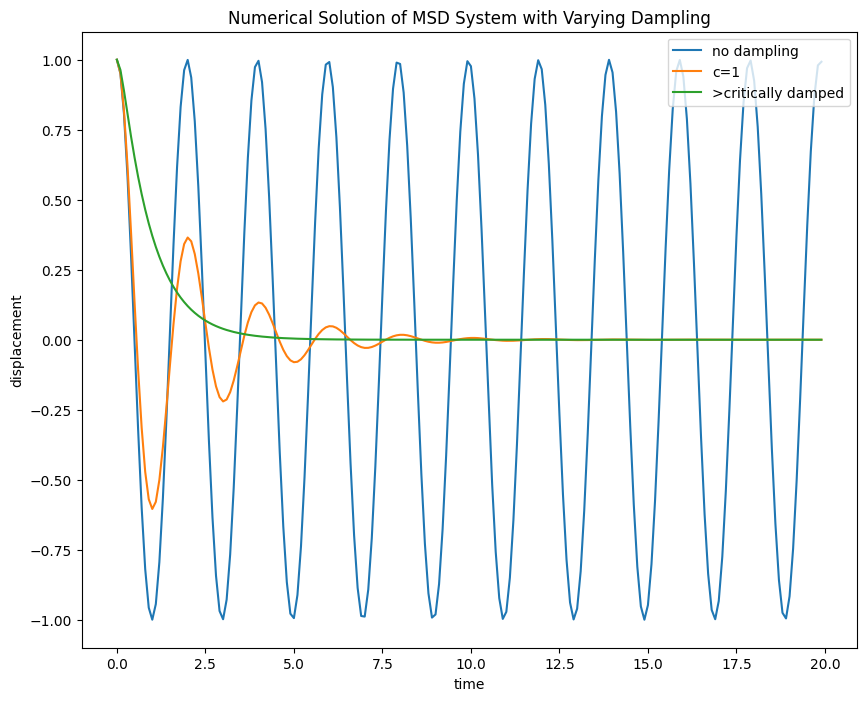

In [ ]:
# Test 2
m = 1
k = 10
f = partial(my_msd, m = m, c = 0, k = k)
t_e = np.arange(0, 20, 0.1)
sol_1 = solve_ivp(f, [0, 20], [1, 0], t_eval = t_e)

f = partial(my_msd, m = m, c = 1, k = k)
sol_2 = solve_ivp(f, [0, 20], [1, 0], t_eval = t_e)

f = partial(my_msd, m = m, c = 10, k = k)
sol_3 = solve_ivp(f, [0, 20], [1, 0], t_eval = t_e)

plt.figure(figsize = (10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title("Numerical Solution of MSD System with Varying Dampling")
plt.xlabel("time")
plt.ylabel("displacement")
plt.legend(["no dampling", "c=1", ">critically damped"], loc = 1)

**5.** Write a function `my_forward_euler(ds, t_span, s0)` where `ds` is a function object, $f(t, s)$, describing a first-order differential equation, `t_span` is an array of times for which numerical solutions of the differential equation are desired, and `s0` is the initial condition of the system. Assume that the size of the state is one. The output argument should be a list of `[t, s]`, such that `t[i] = t_span[i]` for all `i`, and `s` should be the integrated values of `ds` at times `t`. Perform the integration using the forward Euler method, $s[t_i] = s[t_{i-1}] + (t_i - t_{i-1})ds(t_{i-1}, s[t_{i-1}])$. Note that $s[0]$ should equal $s_0$.  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from functools import partial

def my_forward_euler(ds, t_span, s0):
  """
  Function that calculates the numerical solution
  of a first-order differential equation employing
  Euler's forward method
  Args:
    ds: function object f(t, s)
    t_span: array of times for which numerical solutions of the ODE are desired
    s0: initial condition of the system
  """
  t = t_span
  s = np.zeros(len(t))
  s[0] = s0

  # iterate from the second element
  for i in range(1, len(t_span)):
    # Calculate the step
    h = t[i] - t[i - 1]
    #Apply the forward Euler formula
    s[i] = s[i-1] + h*ds(t[i-1], s[i-1])

  return [t, s]

In [ ]:
# Test 1
t_span = np.linspace(0, 1, 10)
s0 =1
# Define parameters
f = lambda t, s: t*np.exp(-s)
t_eul, s_eul = my_forward_euler(f, t_span, s0)
print(t_eul)
print(s_eul)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[1.         1.         1.00454172 1.013584   1.02702534 1.04470783
 1.06642355 1.09192262 1.12092255 1.153118  ]


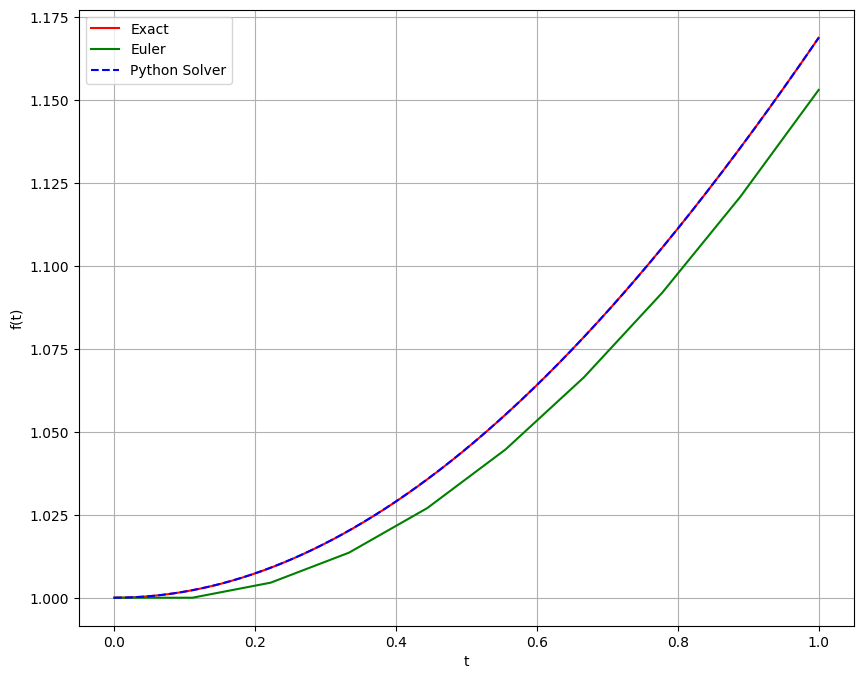

In [ ]:
# test 2
plt.figure(figsize = (10, 8))
# Exact solution
t = np.linspace(0, 1, 1000)
s = np.log(np.exp(s0) + (t
**
2-t[0])/2)
plt.plot(t, s, "r", label="Exact")
# Forward Euler
plt.plot(t_eul, s_eul, "g", label="Euler")
# Python solver
sol = solve_ivp(f, [0, 1], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], "b--", label="Python Solver")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc=2)
plt.show()

**6.** Write a function `myRK4(ds, t_span, s0)`, where the input and output arguments are the same as in Problem 5. The function `myRK4` should numerically integrate `ds` using the fourth-order Runge-Kutta method.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from functools import partial

def myRK4(ds, t_span, s0):
  """
  Function that calculates the numerical solution
  of a first-order differential equation employing
  the fourth-order Runge-Kutta method
  Args:
    ds: function object f(t, s)
    t_span: array of times for which numerical solutions of the ODE are desired
    s0: initial condition of the system
  """
  t = t_span
  s = np.zeros(len(t))
  s[0] = s0

  # iterate from the second element
  for i in range(1, len(t_span)):
    # Calculate the step
    h = t[i] - t[i - 1]
    # Apply the RK-4 Method
    # Apply Runge Kutta Formulas to find next vlue of y
    k1 = h*ds(t[i-1], s[i-1])
    k2 = h*ds(t[i-1] + 0.5*h, s[i-1] + 0.5*k1)
    k3 = h*ds(t[i-1] + 0.5*h, s[i-1] + 0.5*k2)
    k4 = h * ds(t[i-1] + h, s[i-1] + k3)

    # Update next value of y
    s[i] = s[i-1] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)


  return [t, s]

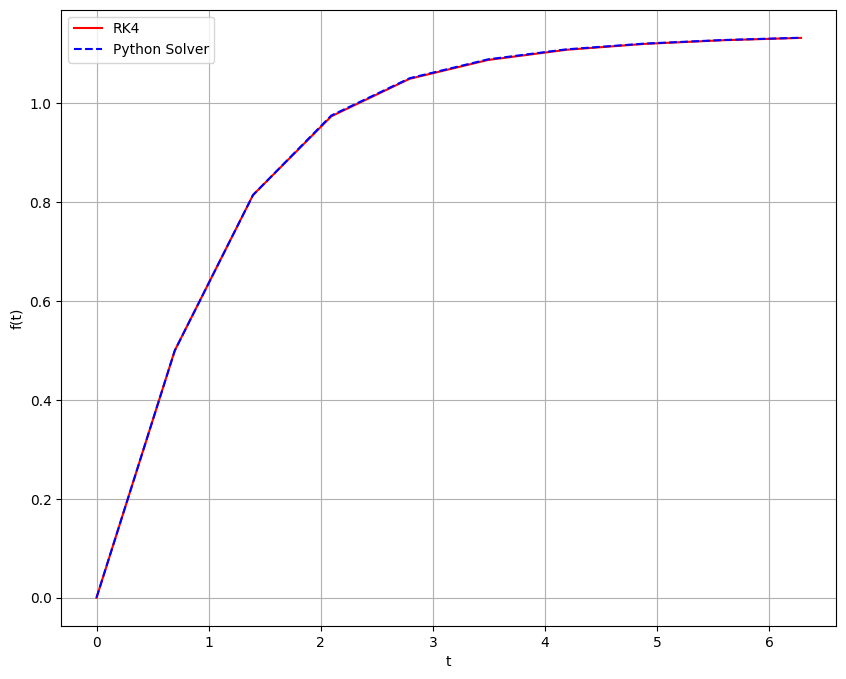

In [ ]:
# Test Case
f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 =0
plt.figure(figsize = (10, 8))

# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, "r", label="RK4")
# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], "b--", label="Python Solver")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid()
plt.legend(loc=2)
plt.show()